In [137]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ML Libraries
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer

In [138]:
breast = load_breast_cancer()

In [139]:
breast_data = breast.data
breast_input = pd.DataFrame(breast_data)

breast_input.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [140]:
breast_labels = breast.target
labels = np.reshape(breast_labels,(569,1))
final_breast_data = np.concatenate([breast_data, labels], axis=1)
breast_dataset = pd.DataFrame(final_breast_data)
features = breast.feature_names

features_labels = np.append(features, 'Type')
breast_dataset.columns = features_labels
breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [141]:
breast_dataset['Type'].replace(0, 'Benign', inplace=True)
breast_dataset['Type'].replace(1, 'Malignant', inplace=True)
breast_dataset.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Type
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,Benign
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,Benign
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,Benign
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,Benign
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,Malignant


In [142]:
# PROBLEM 3: Part 1

#80/20 Training split of all inputs/outputs
y = breast_dataset.pop('Type')
x = breast_dataset.copy();

y[0:10]

0    Benign
1    Benign
2    Benign
3    Benign
4    Benign
5    Benign
6    Benign
7    Benign
8    Benign
9    Benign
Name: Type, dtype: object

In [143]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, train_size=0.8, test_size=0.2)
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
243,13.750,23.77,88.54,590.0,0.08043,0.06807,0.046970,0.023440,0.1773,0.05429,...,15.010,26.34,98.00,706.0,0.09368,0.1442,0.13590,0.06106,0.2663,0.06321
70,18.940,21.31,123.60,1130.0,0.09009,0.10290,0.108000,0.079510,0.1582,0.05461,...,24.860,26.58,165.90,1866.0,0.11930,0.2336,0.26870,0.17890,0.2551,0.06589
412,9.397,21.68,59.75,268.8,0.07969,0.06053,0.037350,0.005128,0.1274,0.06724,...,9.965,27.99,66.61,301.0,0.10860,0.1887,0.18680,0.02564,0.2376,0.09206
173,11.080,14.71,70.21,372.7,0.10060,0.05743,0.023630,0.025830,0.1566,0.06669,...,11.350,16.82,72.01,396.5,0.12160,0.0824,0.03938,0.04306,0.1902,0.07313
556,10.160,19.59,64.73,311.7,0.10030,0.07504,0.005025,0.011160,0.1791,0.06331,...,10.650,22.88,67.88,347.3,0.12650,0.1200,0.01005,0.02232,0.2262,0.06742


In [144]:
# Feature Scaling (Standardization)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [147]:
# Logisitic Regression
classifier = LogisticRegression(solver='newton-cg', penalty='none', random_state=0)
classifier.fit(X_train, Y_train)

LogisticRegression(penalty='none', random_state=0, solver='newton-cg')

In [148]:
Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array(['Benign', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign'], dtype=object)

In [149]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[33,  2],
       [ 3, 76]], dtype=int64)

In [150]:
# Evaluate accuracy, precision, and recall
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, pos_label='Benign'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, pos_label='Benign'))

Accuracy: 0.956140350877193
Precision: 0.9166666666666666
Recall: 0.9428571428571428


[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malignant')]

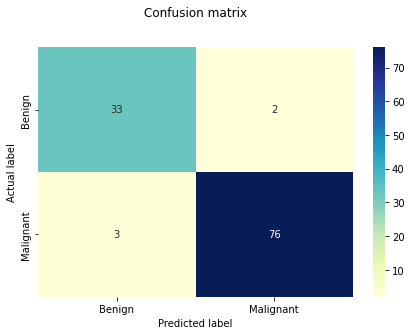

In [151]:
# Visualize confusion matrix using Heatmap
class_names = ['Benign', 'Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_xticklabels(['Benign', 'Malignant'])
ax.set_yticklabels(['Benign', 'Malignant'])

In [152]:
# Problem 3: Part 2

# Feature Scaling (Standardization)
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# Logisitic Regression
classifier = LogisticRegression(penalty='l2',random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

array(['Benign', 'Benign', 'Malignant', 'Malignant', 'Benign',
       'Malignant', 'Malignant', 'Benign', 'Benign'], dtype=object)

In [153]:
# Confusion Matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)
cnf_matrix

array([[34,  1],
       [ 1, 78]], dtype=int64)

In [154]:
# Evaluate accuracy, precision, and recall (with penalties)
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred, pos_label='Benign'))
print("Recall:",metrics.recall_score(Y_test, Y_pred, pos_label='Benign'))

Accuracy: 0.9824561403508771
Precision: 0.9714285714285714
Recall: 0.9714285714285714


[Text(0, 0.5, 'Benign'), Text(0, 1.5, 'Malignant')]

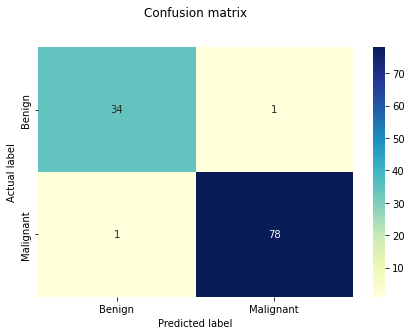

In [155]:
# Visualize confusion matrix using Heatmap
class_names = ['Benign', 'Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
ax.set_xticklabels(['Benign', 'Malignant'])
ax.set_yticklabels(['Benign', 'Malignant'])

In [156]:
# PROBLEM 4: Part 1

sc_Data = StandardScaler()
x_stand = sc_Data.fit_transform(x)

In [157]:
# K-Fold Cross Validation
# K = 5
k5fold = KFold(n_splits=5, random_state=0, shuffle=True)

# Used 'newton-cg' solver so there are no penalties being used
model5 = LogisticRegression(penalty='none', solver='newton-cg')

results5 = cross_val_score(model5, x_stand, y, cv=k5fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results5.mean()*100, results5.std()*100))

Accuracy: 95.259% (2.115%)


In [158]:
# K = 10
k10fold = KFold(n_splits=10, random_state=0, shuffle=True)

# Used 'newton-cg' solver so there are no penalties being used
model10 = LogisticRegression(penalty='none', solver='newton-cg')

results10 = cross_val_score(model10, x_stand, y, cv=k10fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results10.mean()*100, results10.std()*100))

Accuracy: 95.611% (2.250%)


In [159]:
# Problem 4: Part 2

# K = 5
k5fold = KFold(n_splits=5, random_state=0, shuffle=True)
model5 = LogisticRegression(penalty='l2', solver='liblinear')
results5 = cross_val_score(model5, x_stand, y, cv=k5fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results5.mean()*100, results5.std()*100))

Accuracy: 97.193% (1.701%)


In [160]:
# K = 10
k10fold = KFold(n_splits=10, random_state=0, shuffle=True)
model10 = LogisticRegression(penalty='l2', solver='liblinear')
results10 = cross_val_score(model10, x_stand, y, cv=k10fold)
print("Accuracy: %.3f%% (%.3f%%)" % (results10.mean()*100, results10.std()*100))

Accuracy: 97.895% (2.046%)
